In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("iris.csv")

In [4]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.size

750

In [7]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


C:\Users\Madhura\AppData\Local\Temp\ipykernel_18840\1197304490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['sepal.length'],bins=10)


<Axes: ylabel='Density'>

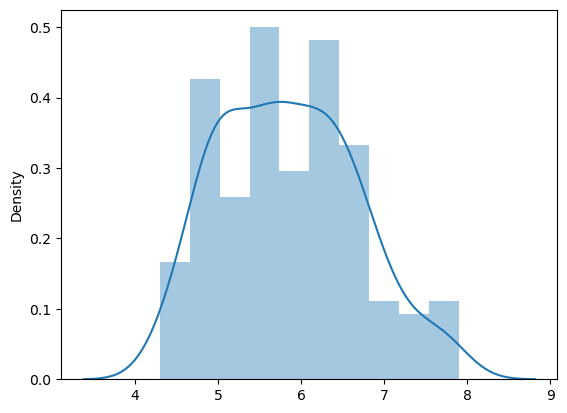

In [14]:
sns.distplot(x=df['sepal.length'],bins=10)

#CREATE HISTOGRAM

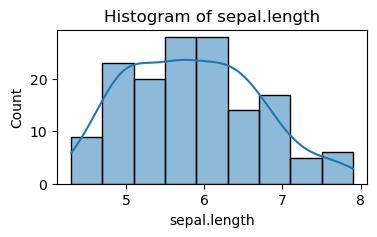

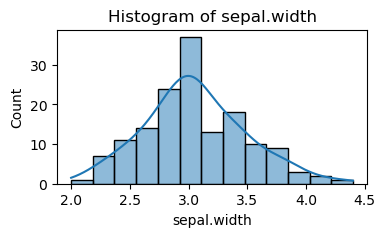

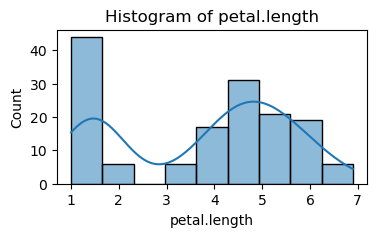

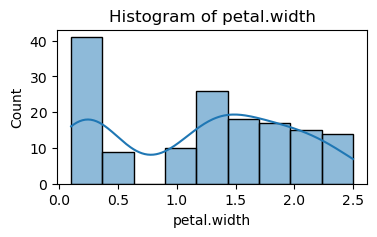

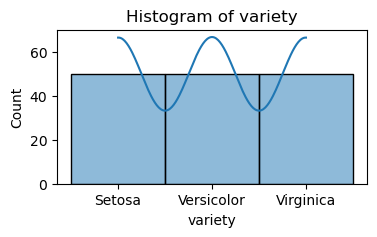

In [15]:
for column in df.columns:
    plt.figure(figsize=(4,2))
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

#CREATE BOXPLOT

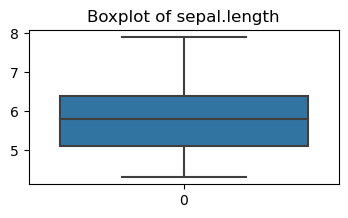

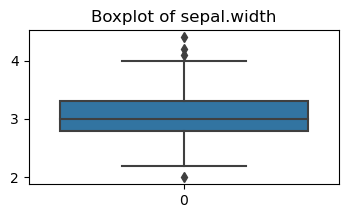

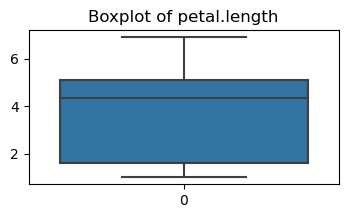

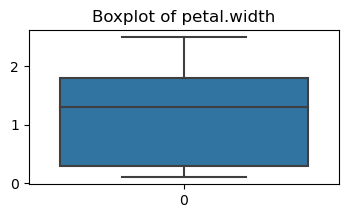

ValueError: could not convert string to float: 'Setosa'

<Figure size 400x200 with 0 Axes>

In [16]:
for column in df.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

C:\Users\Madhura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


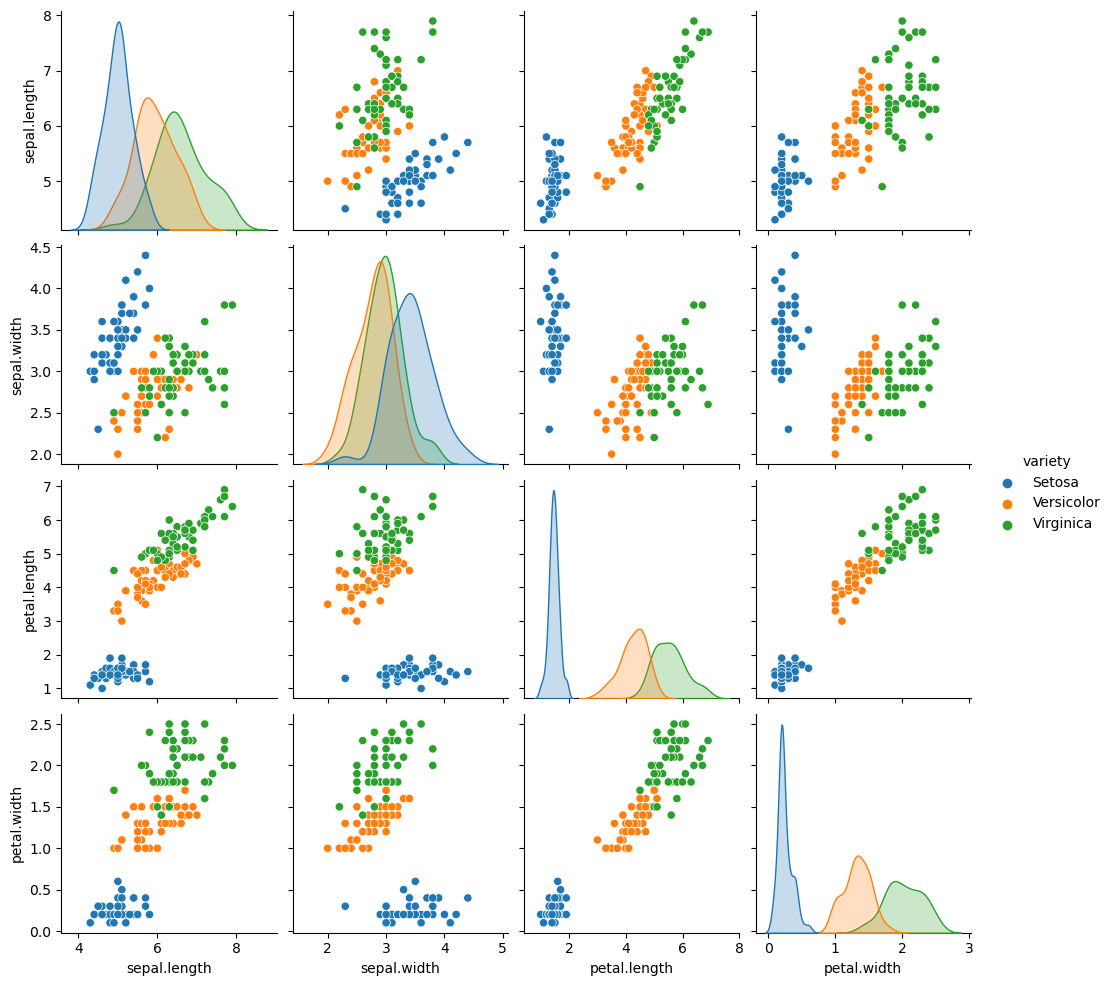

In [17]:
data=sns.pairplot(df,hue="variety")

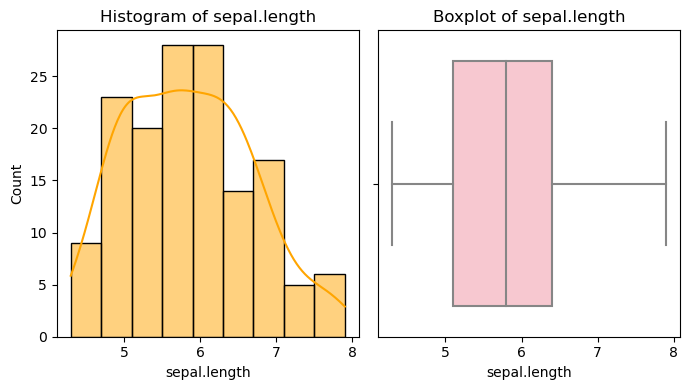

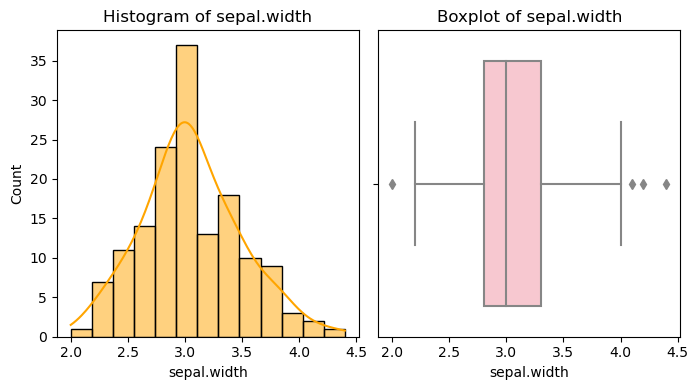

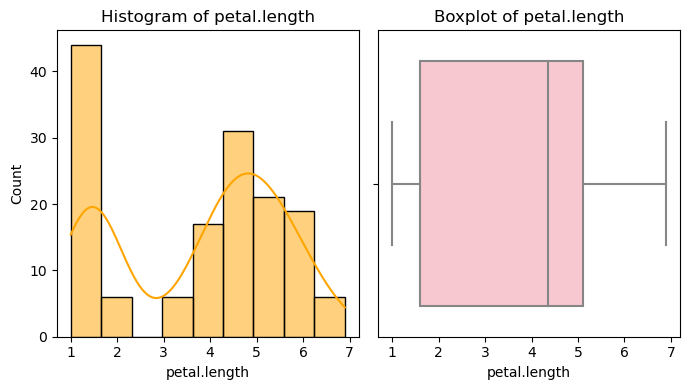

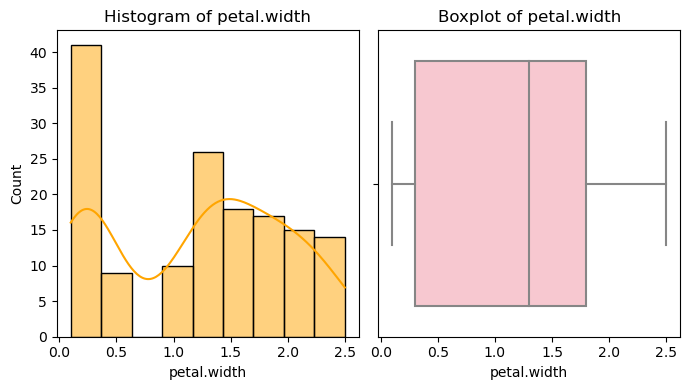

In [23]:
for column in df.columns[:-1]:
    fig,axes=plt.subplots(1,2,figsize=(7,4))
    #plot histogram
    sns.histplot(df[column],kde=True,ax=axes[0],color='orange')
    axes[0].set_title(f'Histogram of {column}')
    #plot boxplot
    sns.boxplot(x=df[column],ax=axes[1],color='pink')
    axes[1].set_title(f'Boxplot of {column}')
    #adjust layout
    plt.tight_layout()
    plt.show()
    

In [24]:
numeric_columns=df.select_dtypes(include=[np.number])
correlation_matrix=numeric_columns.corr()
print(correlation_matrix)

              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


<Axes: >

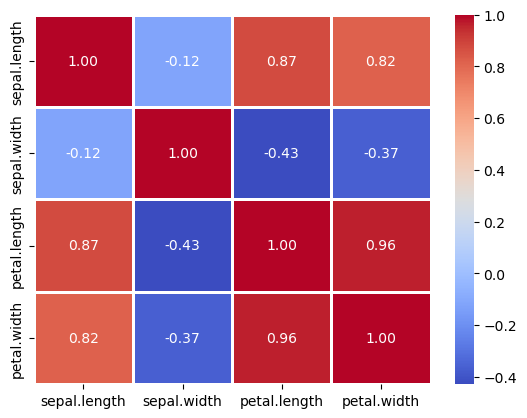

In [25]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=plt.show())

In [26]:
Q1=np.percentile(df['sepal.width'],25,
                interpolation='midpoint')
Q3=np.percentile(df['sepal.width'],75,
                interpolation='midpoint')
IQR=Q3-Q1
print("old shape:",df.shape)

old shape: (150, 5)


C:\Users\Madhura\AppData\Local\Temp\ipykernel_18840\942875194.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(df['sepal.width'],25,
C:\Users\Madhura\AppData\Local\Temp\ipykernel_18840\942875194.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(df['sepal.width'],75,
